## Packages

In [ ]:
!conda install -c conda-forge mlxtend -y

In [4]:
StratifiedKFold?

In [7]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, ShuffleSplit, validation_curve
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from category_encoders.one_hot import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from mlxtend.evaluate import bias_variance_decomp
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

from sklearn import tree
from sklearn.metrics import average_precision_score

## Created Packages 

In [8]:
parent_dir = '/mnt/c/users/17752/Documents/GeorgiaTech/machine_learning'

# Liver Data 

In [9]:
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df = pd.read_csv(f"{parent_dir}/data/liver.csv")
liver_df.drop_duplicates(inplace=True)
impute_Albumin_and_Globulin_Ratio = liver_df[~liver_df.Albumin_and_Globulin_Ratio.isna()].Albumin_and_Globulin_Ratio.mean()
filt_ =  liver_df.Albumin_and_Globulin_Ratio.isna()
liver_df.loc[filt_, "Albumin_and_Globulin_Ratio" ]= impute_Albumin_and_Globulin_Ratio
assert sum(liver_df.Albumin_and_Globulin_Ratio.isna()) == 0 
# format response 
liver_df.loc[(liver_df.Dataset ==2), "Dataset" ] = -1
liver_df.head(10)
liver_df.loc[:,"Gender"] = pd.get_dummies(liver_df.Gender, prefix='gender').drop("gender_Male", axis =1  ).gender_Female
X = liver_df.loc[:, "Age":"Albumin_and_Globulin_Ratio"]
y = liver_df["Dataset"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=62)

#('over', SMOTE(sampling_strategy="minority")
#inital shot 
liver_steps = [('model',DecisionTreeClassifier())] 
liver_pipeline = Pipeline(steps=liver_steps)
stratified_kfold = StratifiedKFold(n_splits = 10, random_state=65, shuffle=True)
scores = cross_val_score(liver_pipeline, X_train, y_train, scoring='accuracy', cv=stratified_kfold, n_jobs=3)
scores.mean()

0.6291304347826087

## Complexity-liver

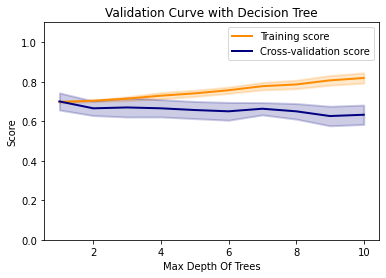

In [14]:
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(criterion="entropy", min_samples_split=10),
                                              X_train,
                                              y_train, 
                                              param_name =  "max_depth",
                                            param_range =np.array(range(1,11)),
                                            cv=cv)

param_range = np.array(range(1,11))

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth Of Trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("DECISION_LIVER_MAX_DEPTH.pdf")
plt.show()

## ccp_alpha-liver

In [1]:
RepeatedStratifiedKFold?

Object `RepeatedStratifiedKFold` not found.


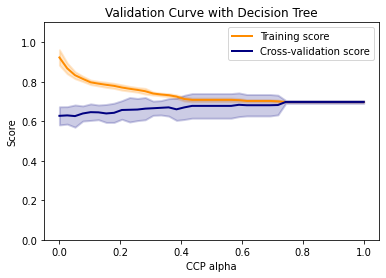

In [10]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=45)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier( max_depth=10),
                                              X_train,
                                              y_train, 
                                              param_name =  "min_samples_split",
                                            param_range =np.linspace(.001,1.,40),
                                            cv=cv)

param_range = np.linspace(.001,1.,40)

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("CCP alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("DECISION_LIVER_CCP_ALPHA.pdf")

plt.show()

## Grid Search 

In [11]:

# example of grid searching key hyperparameters for adaboost on a classification dataset

# define dataset
# define the model with default hyperparameters

# model =  AdaBoostClassifier(algorithm='SAMME')
# define the grid of values to search
grid = dict()
grid['model__max_depth'] = [i for i in range(2,10,1)]
grid['model__min_samples_leaf'] = [i for i in range(2,20,2)]
grid['model__ccp_alpha'] = np.linspace(.0,.12,20)
grid['model__criterion'] = ["gini","entropy"]




# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=45)
# define the grid search procedure
grid_search = GridSearchCV(estimator=liver_pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring='average_precision')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.840163 usin g {'model__ccp_alpha': 0.0, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 18}


In [ ]:
grid_result.best_estimator_
#best on balanced
# Pipeline(steps=[('model',
#                  DecisionTreeClassifier(ccp_alpha=0.013333333333333332,
#                                         criterion='entropy', max_depth=3,
#                                         min_samples_split=4))])

## Learning Curve

In [13]:
def my_learn_curve(title="some title", estimator=None, cv = None , X=None,y=None):
    plt.title(title)
    plt.ylim(0.0, 1.01)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=4,
                       train_sizes=np.linspace(.1, 1.0, 10),
                       return_times=True)
    train_scores_mean =  1.0 - np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean =  1.0 - np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)


    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes,  train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes,  test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="orange",
                 label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'x-', color="b",
                 label="Cross-validation Error")
    plt.legend(loc="best")
    plt.ylabel("Error")
    return plt

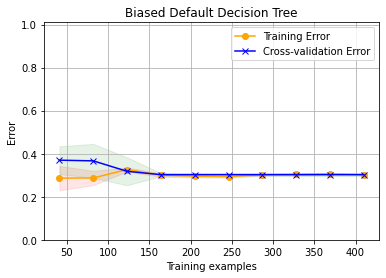

In [20]:
my_learn_curve("Biased Default Decision Tree", DecisionTreeClassifier(max_depth=1), cv=cv , X=X_train, y=y_train )
#all 1s
plt.savefig("DECISION_TREE_BIASED_LIVER.pdf")

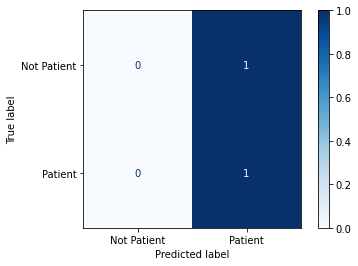

In [16]:
plot_confusion_matrix(estimator=  DecisionTreeClassifier(max_depth=1).fit(X_train,y_train), X=X_train, y_true= y_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

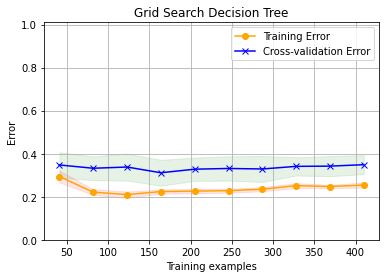

In [26]:

my_learn_curve("Grid Search Decision Tree", grid_result.best_estimator_, cv=cv ,X=X_train, y=y_train )
plt.savefig("DECISION_TREE_final_learning_curve_liver.pdf")


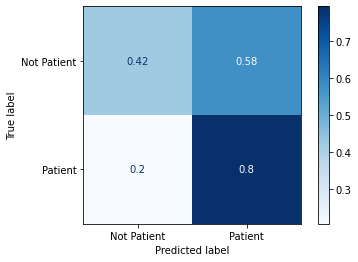

In [25]:
plot_confusion_matrix(estimator= grid_result.best_estimator_, X=X_train, y_true= y_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

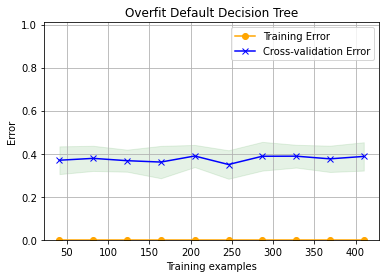

In [24]:
my_learn_curve("Overfit Default Decision Tree", DecisionTreeClassifier(), cv=cv, X=X_train, y=y_train  )
plt.savefig("DECISION_TREE_overfit_LIVER.pdf")

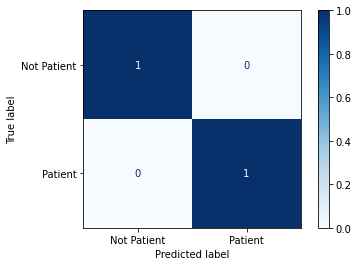

In [21]:
plot_confusion_matrix(estimator= DecisionTreeClassifier().fit(X_train,y_train), X=X_train, y_true= y_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

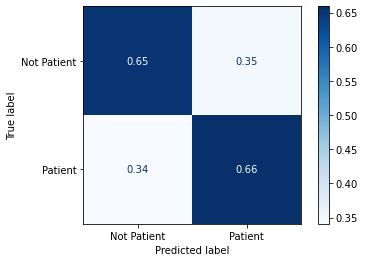

In [27]:
plot_confusion_matrix(estimator= grid_result.best_estimator_, X=X_test, y_true= y_test  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["Not Patient" ,"Patient"]
                        )

In [19]:
print(average_precision_score(y_train, liver_pipeline.fit(X_train, y_train).predict_proba(X_train)[:,1]))

1.0


In [68]:

print(average_precision_score(y_train, grid_result.predict_proba(X_train)[:,1]))
print(average_precision_score(y_test, grid_result.predict_proba(X_test)[:,1]))

0.8974406735092382
0.8580906204038183


In [27]:
print(grid_result.best_estimator_.get_params())
print(classification_report(y_train, grid_result.best_estimator_.predict(X_train) ))
print(classification_report(y_test, grid_result.best_estimator_.predict(X_test) ))

{'memory': None, 'steps': [('model', DecisionTreeClassifier(max_depth=4, min_samples_leaf=18))], 'verbose': False, 'model': DecisionTreeClassifier(max_depth=4, min_samples_leaf=18), 'model__ccp_alpha': 0.0, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__max_features': None, 'model__max_leaf_nodes': None, 'model__min_impurity_decrease': 0.0, 'model__min_impurity_split': None, 'model__min_samples_leaf': 18, 'model__min_samples_split': 2, 'model__min_weight_fraction_leaf': 0.0, 'model__presort': 'deprecated', 'model__random_state': None, 'model__splitter': 'best'}
              precision    recall  f1-score   support

          -1       0.62      0.40      0.49       138
           1       0.77      0.90      0.83       318

    accuracy                           0.75       456
   macro avg       0.70      0.65      0.66       456
weighted avg       0.73      0.75      0.73       456

              precision    recall  f1-score   support

         

## Census Data

In [15]:
census_df = pd.read_csv(f"{parent_dir}/data/adult.csv")
census_df.drop_duplicates(inplace=True)
# # Deleting duplicates 
census_df.duplicated().sum()
#Replacing '?' for nans
census_df = census_df.replace('?', np.NaN)
# Mapping already our target variable in  1 and 0.
census_df.income = census_df.income.map({'<=50K':-1, '>50K':1})

train_data, test_data = train_test_split(census_df,
                                         test_size=0.2,
                                         stratify=census_df['income'],
                                         random_state=65)
print('Train data shape is {}'.format(train_data.shape))
print('Test data shape is {}'.format(test_data.shape))
X_c_train = train_data.drop('income', axis=1)
y_c_train = train_data['income']

#Transforming categorical columns
categorical_columns= X_c_train.select_dtypes(object).columns


#         ('over', SMOTE()),
# Using pipeline
census_steps = [('encoding', OneHotEncoder(cols=categorical_columns)),
         ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
         ('model',DecisionTreeClassifier())]
census_pipeline = Pipeline(steps=census_steps)

#inital shot 
stratified_kfold = StratifiedKFold(n_splits = 5, random_state=65, shuffle=True)
scores = cross_val_score(census_pipeline, X_c_train, y_c_train, scoring='roc_auc', cv=stratified_kfold, n_jobs=3)
print(f'Gradient Boosting  AUC imputing missing values: {round(np.mean(scores),3)}')
X_c_test = test_data.drop('income', axis=1)
y_c_test = test_data['income']


Train data shape is (26029, 15)
Test data shape is (6508, 15)
Gradient Boosting  AUC imputing missing values: 0.753


## Complexity -census 

In [92]:
sum(y_c_train==-1)

19758

In [29]:
import warnings
warnings.filterwarnings("ignore")

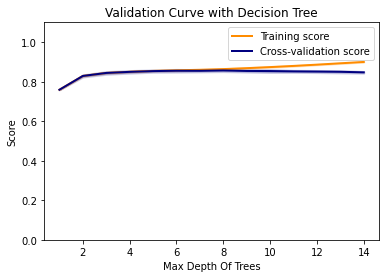

In [30]:

train_scores, valid_scores = validation_curve(census_pipeline,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__max_depth",
                                            param_range =np.array(range(1,15)),
                                            cv=stratified_kfold)

param_range = np.array(range(1,15))

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth Of Trees")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("DECSION_TREE_MAX_DEPTH_CENSUS.pdf")
plt.show()

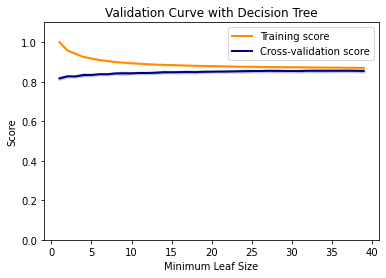

In [31]:
# cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# # Using pipeline
# census_steps_depth = [('encoding', OneHotEncoder(cols=categorical_columns)),
#          ('imputer',SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
#          ('model',DecisionTreeClassifier(max_depth=40))]
# census_pipeline_depth = Pipeline(steps=census_steps_depth)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=45)
train_scores, valid_scores = validation_curve(census_pipeline,
                                              X_c_train,
                                              y_c_train, 
                                              param_name =  "model__min_samples_leaf",
                                            param_range = np.array(range(1,40)),
                                            cv=stratified_kfold)

param_range =  np.array(range(1,40))

train_scores_mean =  np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Minimum Leaf Size")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
# semilogx
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")


plt.savefig("DECSION_TREE_MININMUM_LEAF_SIZE_CENSUS.pdf")

plt.show()

In [32]:

# example of grid searching key hyperparameters for adaboost on a classification dataset

# define dataset
# define the model with default hyperparameters

# model =  AdaBoostClassifier(algorithm='SAMME')
# define the grid of values to search
grid = dict()
# grid['model__n_estimators'] = [i for i in range(1,25,5)]
# grid['model__learning_rate'] = [0.01, 0.1]
# grid['model__base_estimator'] = [DecisionTreeClassifier(max_depth=max_depth_,
#                                                  ccp_alpha=ccp, 
#                                                  criterion=crit,
#                                                  min_samples_split = min_samples_split_)  
#                           for max_depth_ in range(1,4) 
#                           for ccp in np.arange(0.0001, 0.051, 0.005)
#                           for crit in ["entropy"]
#                           for min_samples_split_ in range(2,10,2)
#                            ]

grid['model__max_depth'] = [i for i in range(2,12,1)]
grid['model__min_samples_leaf'] = [i for i in range(2,20,2)]
grid['model__ccp_alpha'] = np.linspace(.0,.12,10)




# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=45)
# define the grid search procedure
grid_search_census = GridSearchCV(estimator=census_pipeline, param_grid=grid, n_jobs=-1, cv=cv, scoring='average_precision')
# execute the grid search
grid_result_census = grid_search_census.fit(X_c_train, y_c_train)
# summarize the best score and configuration
print("Best: %f usin g %s" % (grid_result_census.best_score_, grid_result_census.best_params_))
# summarize all scores that were evaluated
means = grid_result_census.cv_results_['mean_test_score']
stds = grid_result_census.cv_results_['std_test_score']
params = grid_result_census.cv_results_['params']

Best: 0.770337 usin g {'model__ccp_alpha': 0.0, 'model__max_depth': 11, 'model__min_samples_leaf': 18}


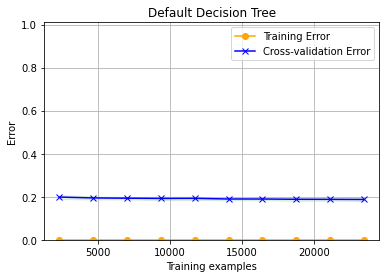

In [17]:
my_learn_curve("Default Decision Tree",census_pipeline, cv=cv ,X=X_c_train, y=y_c_train )
plt.savefig("DECISION_TREE_CENSUS_base_LEARNING_CURVE.PDF")

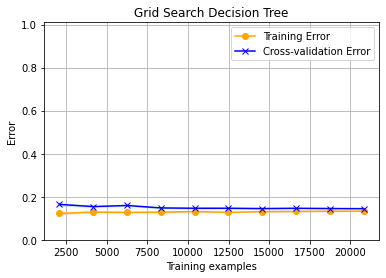

In [33]:
my_learn_curve("Grid Search Decision Tree", grid_result_census.best_estimator_, cv=cv ,X=X_c_train, y=y_c_train )
plt.savefig("DECISION_TREE_CENSUS_FINAL_LEARNING_CURVE.PDF")

<module 'matplotlib.pyplot' from '/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/matplotlib/pyplot.py'>

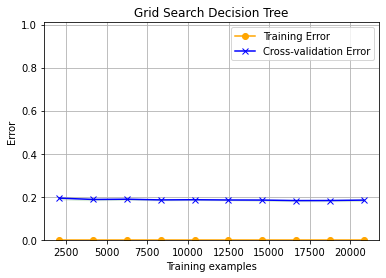

In [74]:
my_learn_curve("Grid Search Decision Tree",census_pipeline, cv=cv ,X=X_c_train, y=y_c_train )

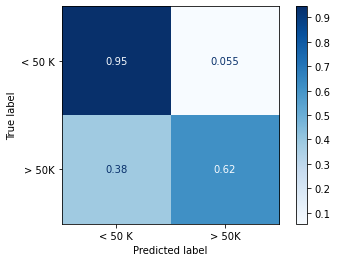

In [38]:
plot_confusion_matrix(estimator= grid_result_census.best_estimator_, X=X_c_train, y_true= y_c_train  , 
                      cmap=plt.cm.Blues,
                       normalize="true",
                      display_labels = ["< 50 K" ,"> 50K"]
                        )

In [21]:
print(average_precision_score(y_c_train, census_pipeline.fit(X_c_train, y_c_train).predict_proba(X_c_train)[:,1]))

/home/flufylobster/anaconda3/envs/ML39/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


1.0


In [67]:

print(average_precision_score(y_c_train, grid_result_census.predict_proba(X_c_train)[:,1]))
print(average_precision_score(y_c_test, grid_result_census.predict_proba(X_c_test)[:,1]))

0.8065813714965082
0.774824260419377


In [39]:
print(grid_result_census.best_estimator_.get_params())
print(classification_report(y_c_train, grid_result_census.best_estimator_.predict(X_c_train) ))
print(classification_report(y_c_test, grid_result_census.best_estimator_.predict(X_c_test) ))

{'memory': None, 'steps': [('encoding', OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'))), ('imputer', SimpleImputer(strategy='most_frequent')), ('model', DecisionTreeClassifier(max_depth=11, min_samples_leaf=18))], 'verbose': False, 'encoding': OneHotEncoder(cols=Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')), 'imputer': SimpleImputer(strategy='most_frequent'), 'model': DecisionTreeClassifier(max_depth=11, min_samples_leaf=18), 'encoding__cols': Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object'), 'encoding__drop_invariant': False, 'encoding__handle_missing': 'value', 'encoding__handle_unknown': 'value', 'encoding__return_df': True, 'encoding__use_cat_names': False, 'encoding__verbose'